In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


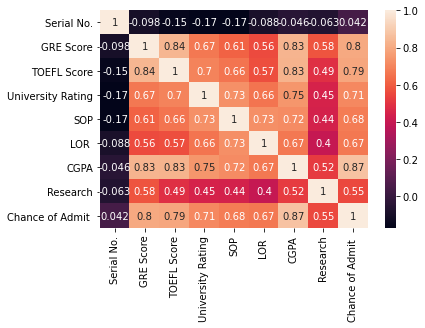

In [12]:
sns.heatmap(data = df.corr(),annot=True)

In [14]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [16]:
df.drop(['Serial No.','Research'],axis =1, inplace=True)

In [17]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65


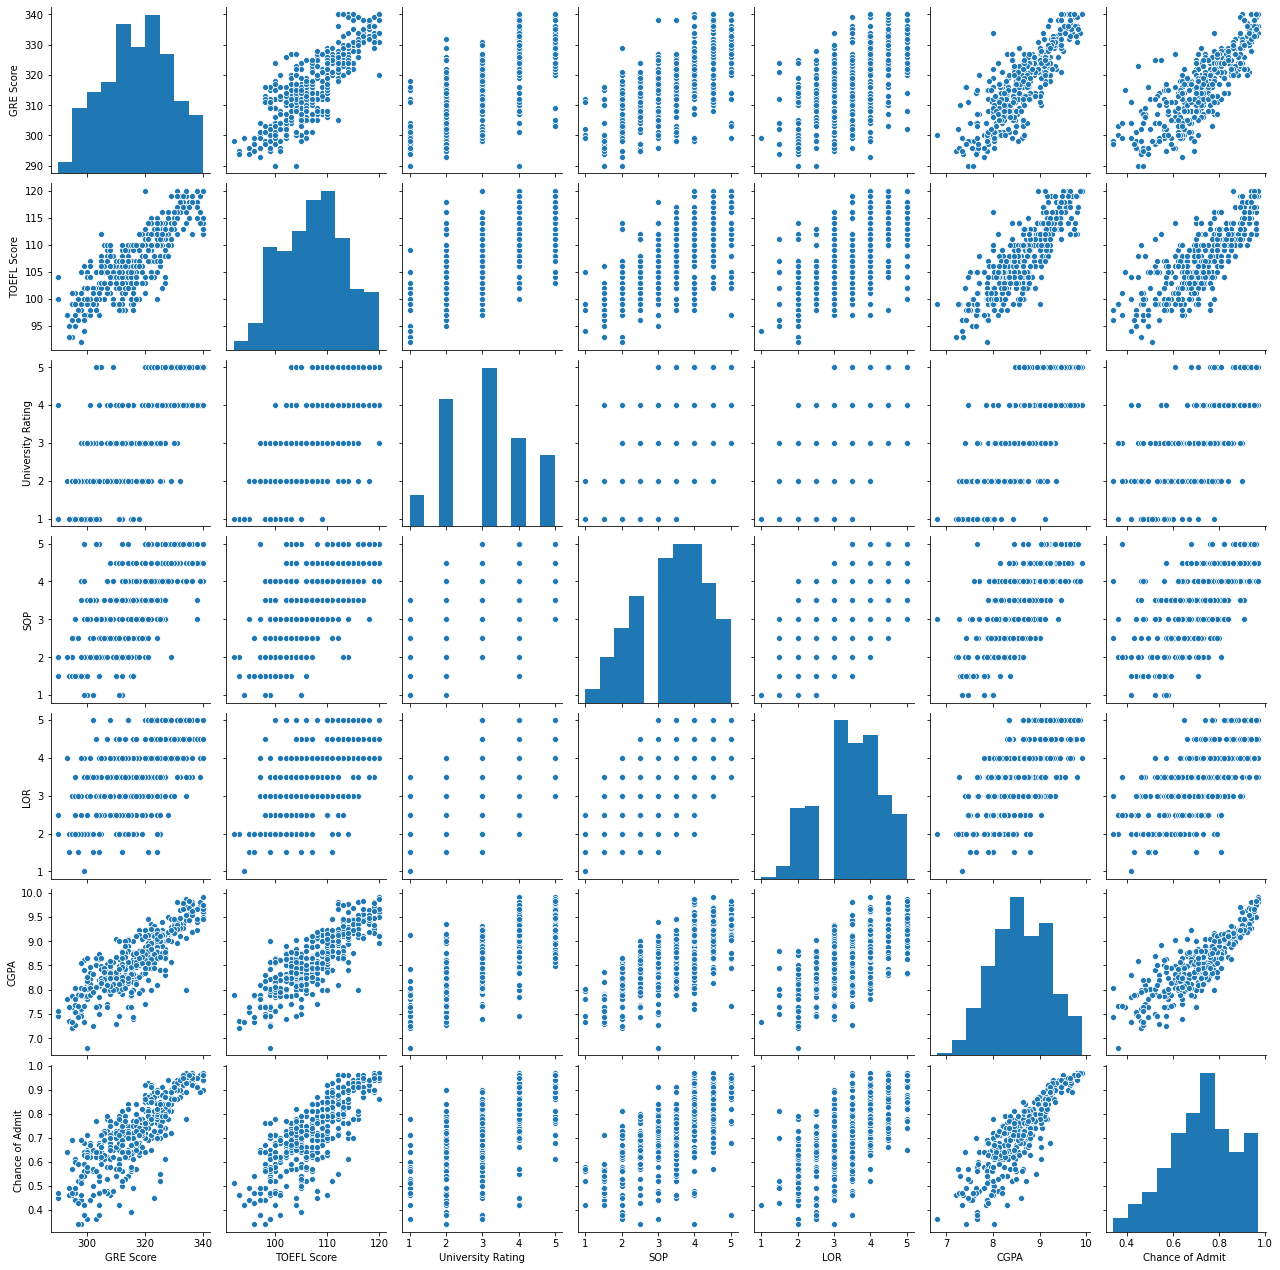

In [19]:
sns.pairplot(df)

In [21]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Chance of Admit      0
dtype: int64

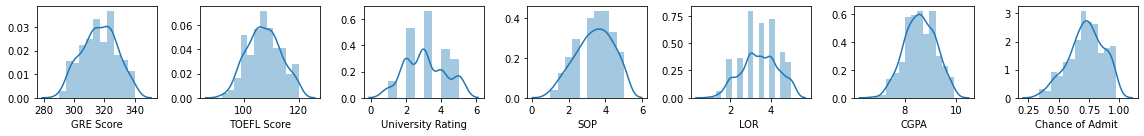

In [32]:
rows = 1
cols = 7
fig,ax = plt.subplots(nrows = rows,ncols = cols, figsize = (16,2))
col = df.columns
index = 0
for j in range(cols):
    sns.distplot(df[col[index]],ax = ax[j])
    index+=1

plt.tight_layout()


In [33]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Chance of Admit '],
      dtype='object')

In [35]:
X = df.drop(labels = ['Chance of Admit '],axis=1)
y = df['Chance of Admit ']

In [37]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


In [39]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
X_train.shape,y_train.shape

((268, 6), (268,))

In [44]:
X_test.shape,y_test.shape

((132, 6), (132,))

In [45]:
from sklearn.linear_model import LinearRegression

In [91]:
lm = LinearRegression()

In [92]:
lm.fit(X_train,y_train)

LinearRegression()

In [93]:
predictions = lm.predict(X_test)

In [53]:
#Predicted data frame

pdf = pd.DataFrame(data = [predictions,y_test])
pdf.T

,0,1
0,0.633853,0.68
1,0.711943,0.68
2,0.937499,0.90
3,0.816765,0.79
4,0.562989,0.44
...,...,...
127,0.642270,0.75
128,0.656151,0.64
129,0.800557,0.81
130,0.837614,0.84


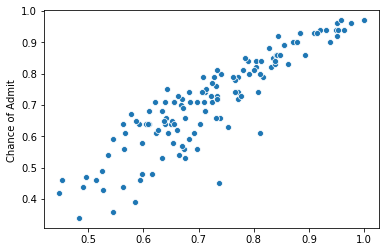

In [54]:
sns.scatterplot(x = predictions , y= y_test)

In [57]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [58]:
score = r2_score(y_test,predictions)
mae = metrics.mean_absolute_error(y_test,predictions)
mse = metrics.mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)

print('R2 Score : ', str(score))
print('mae : ', str(mae))
print('mse : ', str(mse))
print('rmse : ', str(rmse))

R2 Score :  0.7970614883414088
mae :  0.048848539117254515
mse :  0.004541555175461918
rmse :  0.06739106153980598


In [59]:
## Inference ###

# With columns = those whose corr with Chance of Admit was >0.6  we got : - 
# R2 Score :  0.7970614883414088
# mae :  0.048848539117254515
# mse :  0.004541555175461918
# rmse :  0.06739106153980598

# With columns = those whose corr with Chance of Admit was >0.75

In [80]:
df = pd.read_csv('Admission_Predict.csv')

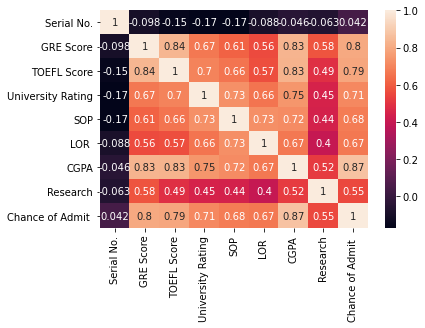

In [81]:
sns.heatmap(data = df.corr(),annot=True)

In [82]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [83]:
df.drop(['Serial No.','Research','SOP',
       'LOR ','University Rating'],axis =1, inplace=True)

In [84]:
df.head()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,337,118,9.65,0.92
1,324,107,8.87,0.76
2,316,104,8.00,0.72
3,322,110,8.67,0.80
4,314,103,8.21,0.65


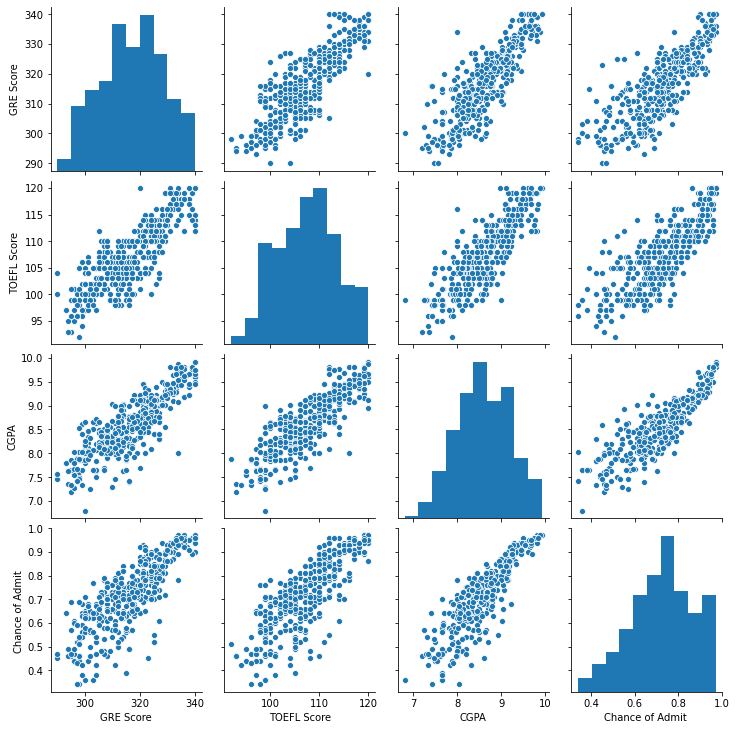

In [85]:
sns.pairplot(df)

In [86]:
X = df.drop(labels = ['Chance of Admit '],axis=1)
y = df['Chance of Admit ']

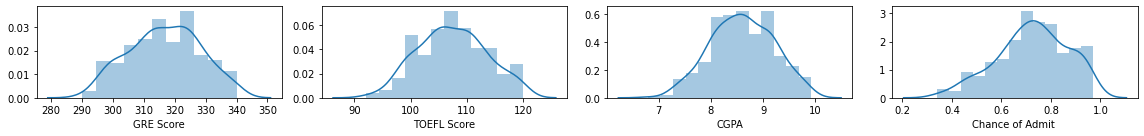

In [88]:
rows = 1
cols = 4
fig,ax = plt.subplots(nrows = rows,ncols = cols, figsize = (16,2))
col = df.columns
index = 0
for j in range(cols):
    sns.distplot(df[col[index]],ax = ax[j])
    index+=1

plt.tight_layout()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [94]:
#Predicted data frame

pdf = pd.DataFrame(data = [predictions,y_test])
pdf.T

,0,1
0,0.612922,0.68
1,0.702606,0.68
2,0.943261,0.90
3,0.813382,0.79
4,0.556973,0.44
...,...,...
127,0.648351,0.75
128,0.655654,0.64
129,0.821262,0.81
130,0.837185,0.84


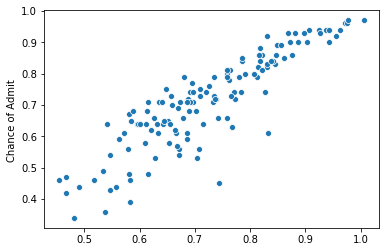

In [95]:
sns.scatterplot(x = predictions , y= y_test)

In [96]:
score = r2_score(y_test,predictions)
mae = metrics.mean_absolute_error(y_test,predictions)
mse = metrics.mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)

print('R2 Score : ', str(score))
print('mae : ', str(mae))
print('mse : ', str(mse))
print('rmse : ', str(rmse))

R2 Score :  0.7782942521258785
mae :  0.05074557794421181
mse :  0.004961546620492059
rmse :  0.07043824685845083


In [ ]:
## Inference ###

# With columns = those whose corr with Chance of Admit was >0.6  we got : - 
# R2 Score :  0.7970614883414088
# mae :  0.048848539117254515
# mse :  0.004541555175461918
# rmse :  0.06739106153980598

# With columns = those whose corr with Chance of Admit was >0.75  we got : - 
# R2 Score :  0.7782942521258785
# mae :  0.05074557794421181
# mse :  0.004961546620492059
# rmse :  0.07043824685845083
